In [2]:
# import libraries and dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
#Checking for Null values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

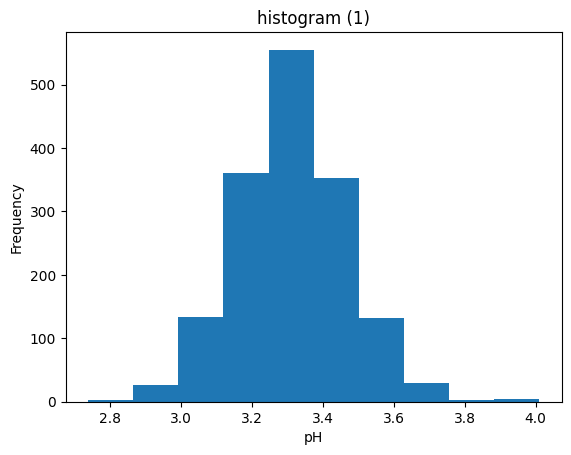

In [8]:
p = df['pH']
bins = 10


plt.hist(p,bins)
plt.title("histogram (1)")
plt.xlabel("pH")
plt.ylabel("Frequency")
plt.show()

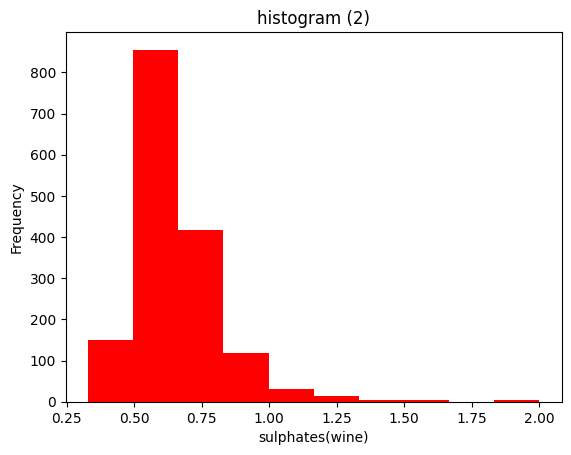

In [9]:
s = df['sulphates']
bins = 10


plt.hist(s,bins,color = "red")
plt.title("histogram (2)")
plt.xlabel("sulphates(wine)")
plt.ylabel("Frequency")
plt.show()

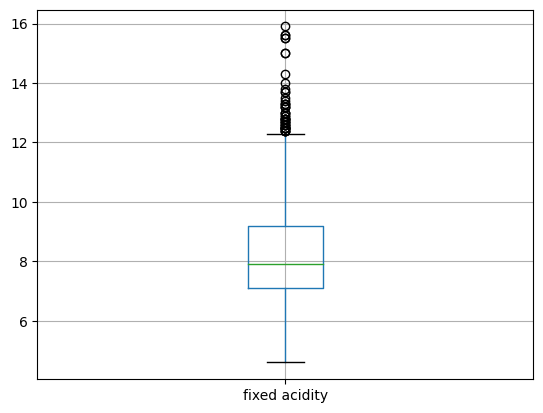

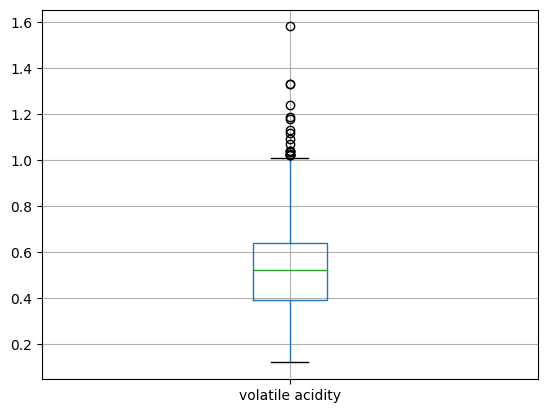

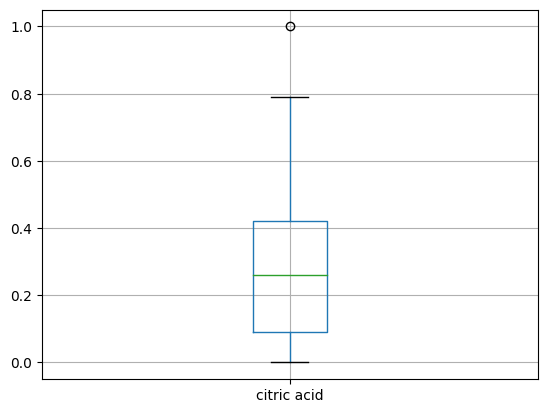

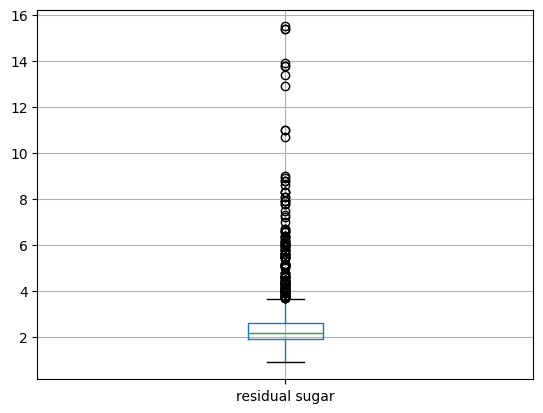

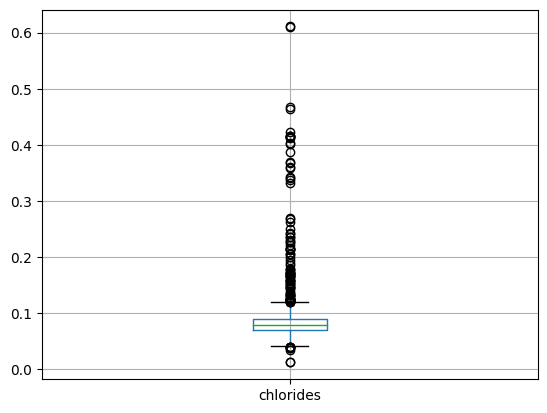

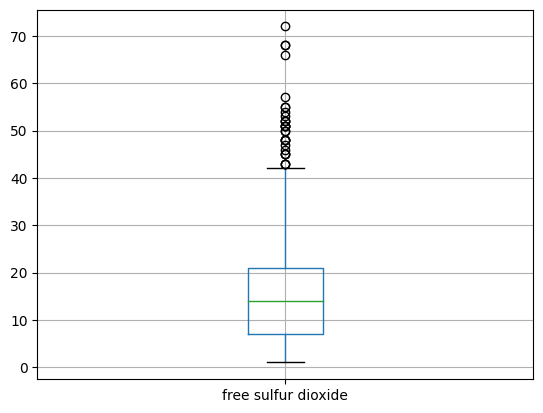

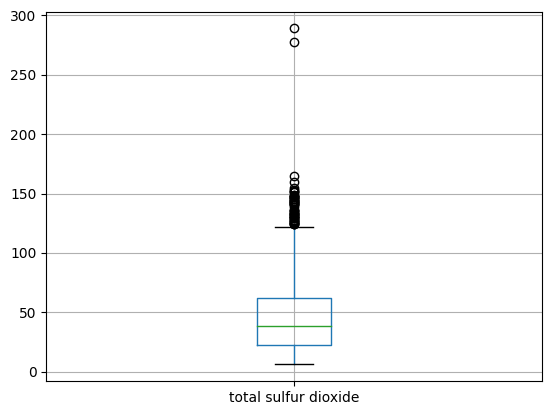

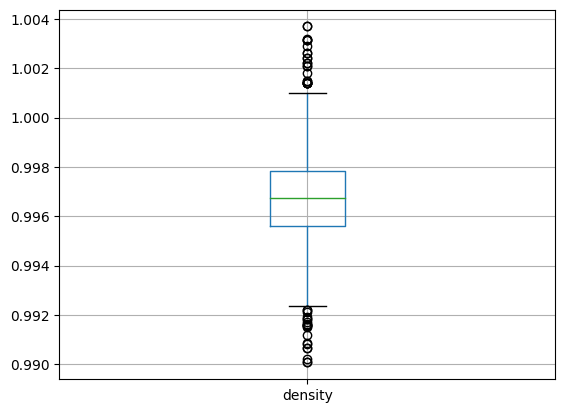

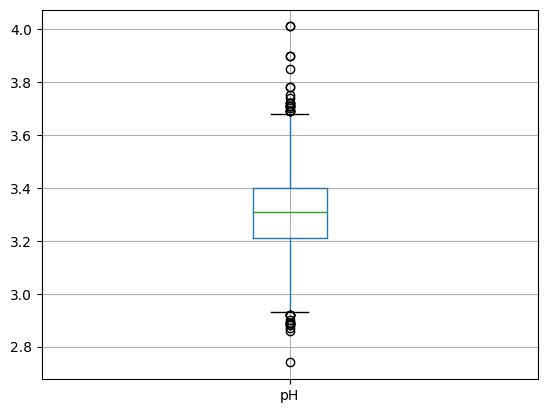

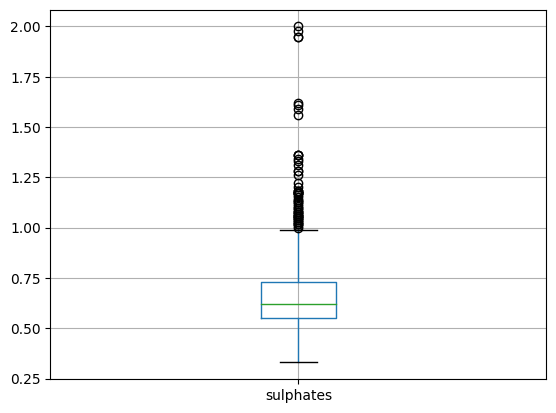

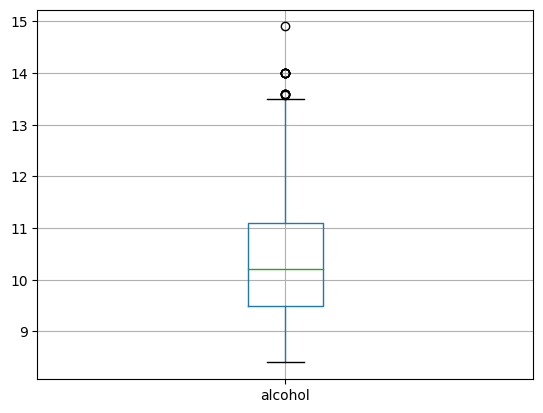

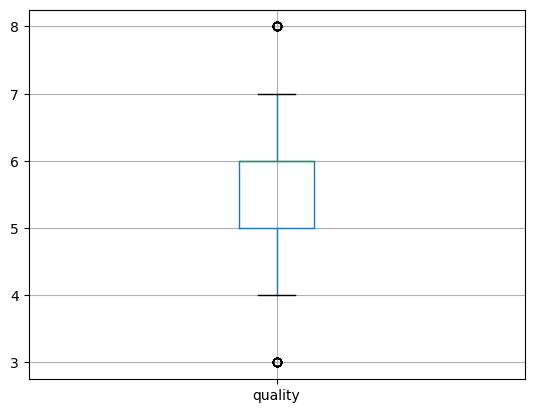

In [10]:
for cl in df:
    plt.figure()
    df.boxplot([cl])

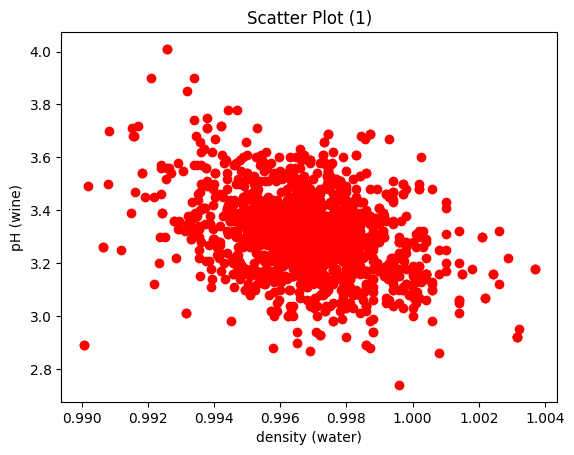

In [11]:
#Plotting
d = df["density"]
p = df["pH"]

plt.scatter(d, p, color= 'red')
plt.title("Scatter Plot (1)")
plt.xlabel("density (water)")
plt.ylabel("pH (wine)")
plt.show()

In [12]:
#values of X and y
features = ['citric acid','alcohol','residual sugar','pH','total sulfur dioxide']  #input values

X = df[features]
y = df['quality'] 

In [13]:
#Model Fitting
from sklearn.preprocessing import LabelEncoder
le =LabelEncoder()
y= le.fit_transform(y)

In [14]:
#Splitting of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0 ,shuffle=True)

In [15]:
s_c = StandardScaler()
X_train =s_c.fit_transform(X_train)
X_test = s_c.fit_transform(X_test)

In [16]:
model = KNeighborsClassifier (n_neighbors=7,p=1)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7, p=1)

In [17]:
#Model Prediction
y_pred=model.predict(X_test)
y_pred

c:\Users\AL REHMAN LAPTOP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([3, 2, 4, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 4, 2, 2, 3, 3, 2,
       3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 3, 3, 3, 2, 4, 1, 2, 4, 3, 3,
       3, 2, 2, 2, 3, 4, 2, 2, 3, 4, 2, 2, 2, 2, 4, 2, 2, 2, 3, 3, 2, 3,
       2, 2, 4, 4, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 4, 4, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 3, 2,
       3, 2, 4, 2, 3, 3, 2, 4, 2, 3, 2, 2, 2, 2, 3, 4, 2, 2, 3, 2, 2, 2,
       2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 4, 3, 2, 2, 2, 4, 2, 3,
       2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 4, 3, 2, 3, 3, 1, 3,
       4, 4, 3, 2, 2, 4, 2, 2, 4, 3, 3, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2,
       2, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 4, 2, 2, 2, 4, 3, 2,
       2, 3, 3, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 4, 3, 2, 3, 4, 3, 3, 3,
       2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 4, 2, 3,
       1, 2, 2, 2, 2, 3, 2, 2, 2, 3, 4, 3, 3, 3, 4, 4, 2, 4, 2, 3, 2, 2,
       2, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 2, 3, 2, 3,

In [18]:
c_m = confusion_matrix(y_test, y_pred)
c_m

array([[  0,   0,   1,   1,   0,   0],
       [  0,   0,   6,   5,   0,   0],
       [  0,   2, 107,  21,   5,   0],
       [  0,   0,  57,  67,  18,   0],
       [  0,   1,   3,  10,  13,   0],
       [  0,   0,   1,   1,   1,   0]], dtype=int64)

Text(0.5, 23.52222222222222, 'Predicted label')

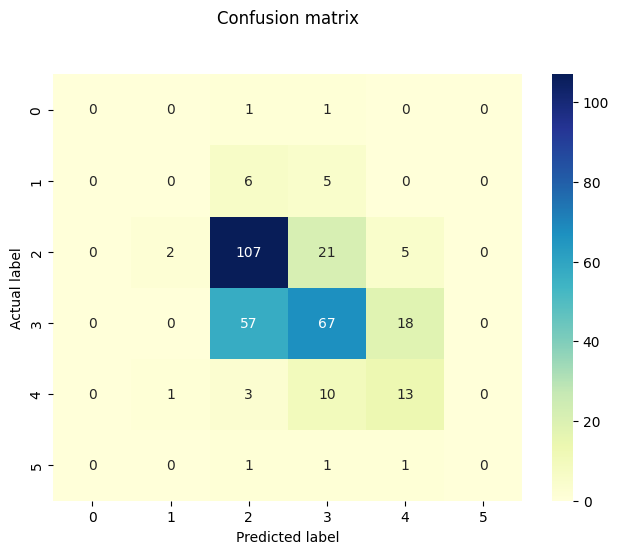

In [19]:
# ploting heatmap
# create heatmap
sns.heatmap(pd.DataFrame(c_m), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
score = accuracy_score(y_test, y_pred)
print('The accuracy score of our model is', score)

The accuracy score of our model is 0.584375


In [22]:
print('percentage Accuracy using KNN is : ',100*accuracy_score(y_test, y_pred))

percentage Accuracy using KNN is :  58.4375


#### The accuracy of the model is 58%

<center>
<h2><b>The End</b></h2>
------------------------------------------------------------------------------------------------------------------------------------------
</center>